In [1]:
import torch
import pandas as pd
import numpy as np
import os
import torch.utils
import torchvision.transforms
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from PIL import ImageDraw, Image
%matplotlib inline

torch.set_printoptions(threshold=1000)

In [7]:
Dataset_dir = "../Cyclist_Detection/Dataset"

In [11]:
#Writing our Dataset class
class YoloPtDataset(torch.utils.data.Dataset):
    """Dataset with tensor format images and Yolo format labels"""

    def __init__(self,root_dir,data_type=None,transform=None):
        if data_type is None:
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a src file with the paths to all the images")
        elif data_type == 'train' or data_type == 'Train':
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","train_src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a train_src file with the paths to all the images")

        elif data_type == 'val' or data_type == 'Validate' or data_type == 'validate':
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","val_src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a val_src file with the paths to all the images")

        elif data_type == 'test' or data_type == 'Test':
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","test_src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a test_src file with the paths to all the images")
        else:
            raise ValueError("Wrong argument has been passed through data_type, must be one of: train,test,val")



        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path, label_path = self.paths.iloc[idx,1:].values

        return torch.load(img_path),torch.load(label_path)

In [12]:
def yolo_to_xy(yolo,resolution):
    xy = []
    x_cent = float(yolo[1]*resolution[1])
    y_cent = float(yolo[2]*resolution[0])
    width = float(yolo[3]*resolution[1])
    height = float(yolo[4]*resolution[0])
    xy.append(x_cent-(width/2))
    xy.append(y_cent-(height/2))
    xy.append(x_cent+(width/2))
    xy.append(y_cent+(height/2))
    return xy

In [13]:
def Display_yolo(data):

    img, label = data[0],data[1]

    #Removing negative padding
    for i in range(len(label)):
        if label[i][0] == -1:
            label = label[0:i]
            break

    resolution = img.size()[1:3]
    trans = torchvision.transforms.ToPILImage()
    img = trans(img)
    draw = ImageDraw.Draw(img)

    #Removing the padded elements in he


    #Re-calculates the yolo format to top-left and bottom right points
    for i in range(len(label)):
        draw.rectangle(yolo_to_xy(label[i],resolution))

    display(img)

In [23]:
train = YoloPtDataset(Dataset_dir,data_type='train')
val = YoloPtDataset(Dataset_dir,data_type='val')
test = YoloPtDataset(Dataset_dir,data_type='test')
train_iter = torch.utils.data.DataLoader(train,batch_size=32,shuffle=True)
val_iter = torch.utils.data.DataLoader(val,batch_size=len(val),shuffle=False)
test_iter = torch.utils.data.DataLoader(test,batch_size=len(test),shuffle=False)

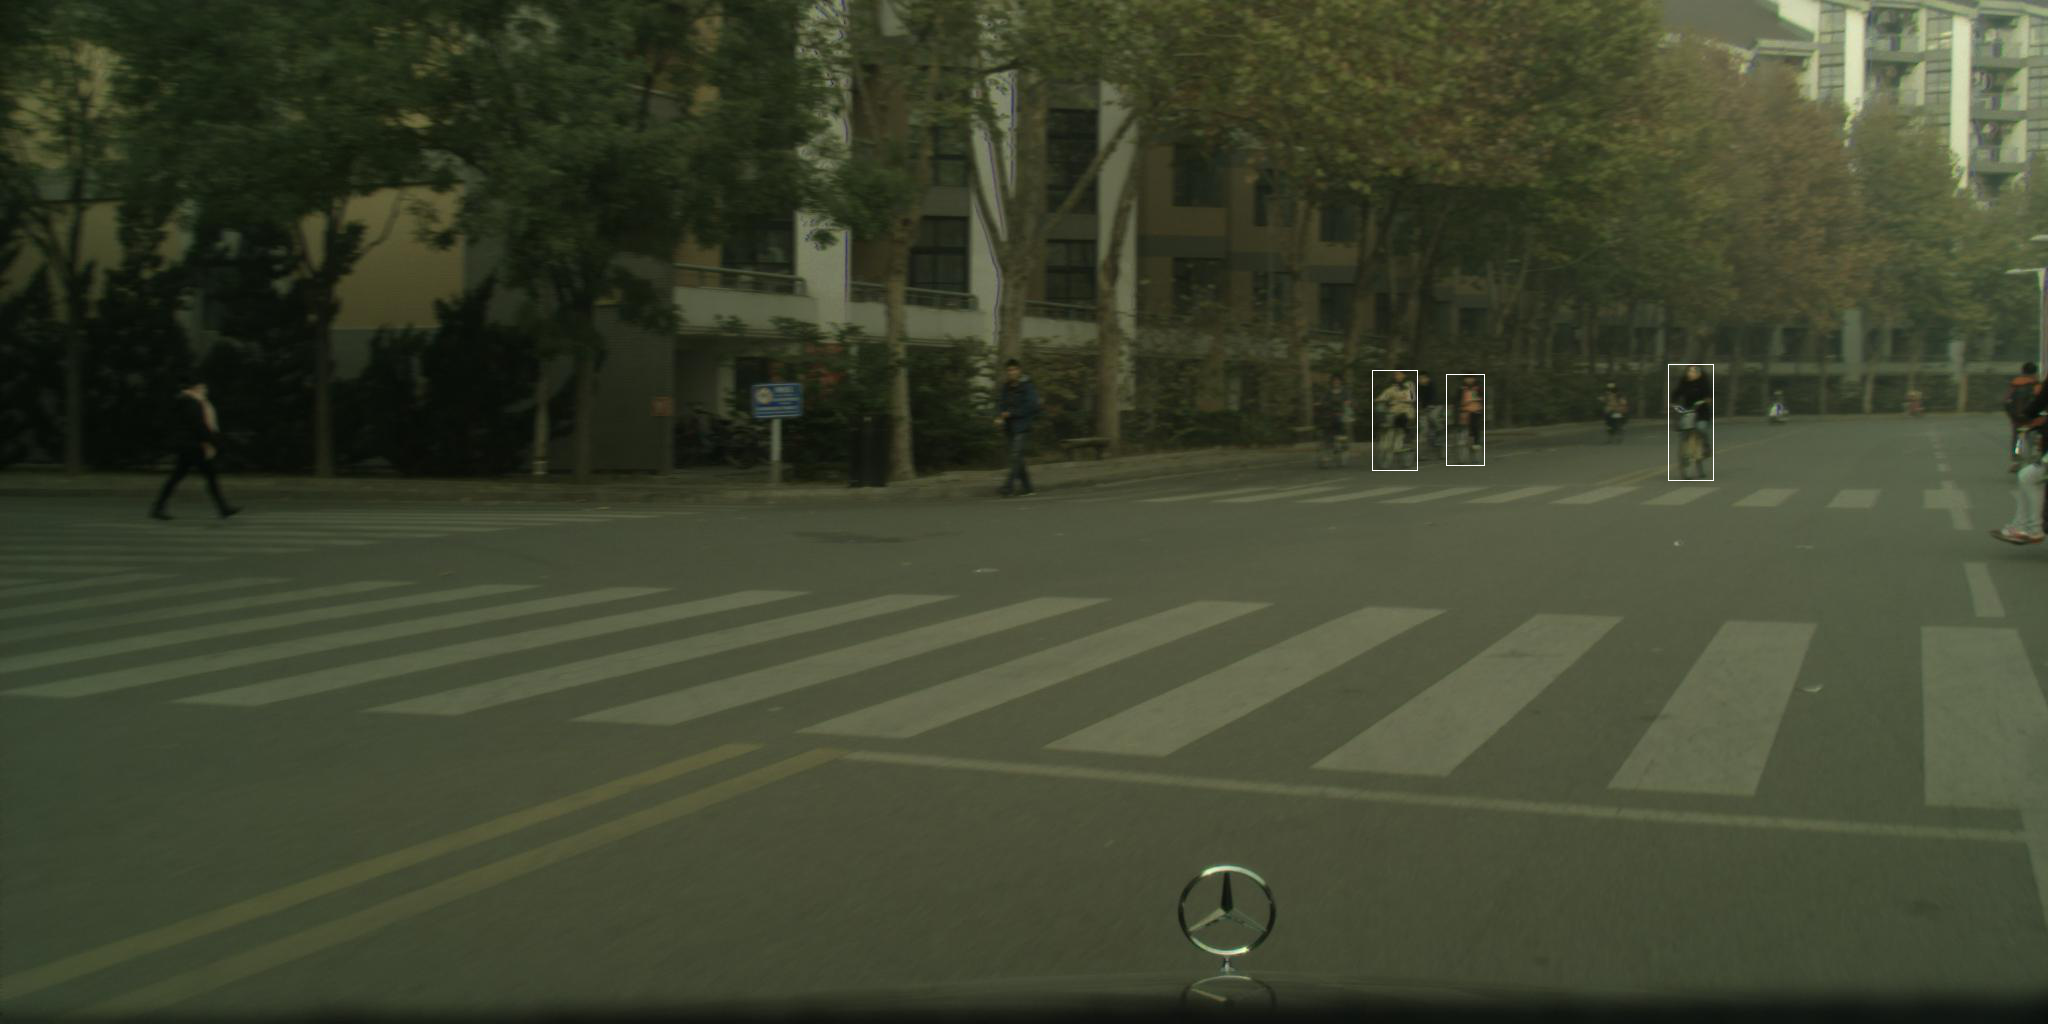

In [18]:
Display_yolo(train[400])

In [24]:
next(iter(train_iter))

[tensor([[[[131, 130, 122,  ..., 239, 239, 240],
           [121, 114, 108,  ..., 239, 241, 240],
           [112, 114, 120,  ..., 239, 240, 240],
           ...,
           [ 24,  24,  24,  ...,  14,  14,  14],
           [ 24,  24,  24,  ...,  14,  14,  14],
           [ 24,  24,  24,  ...,  14,  14,  14]],
 
          [[157, 156, 148,  ..., 255, 255, 255],
           [147, 140, 134,  ..., 255, 255, 255],
           [138, 140, 146,  ..., 255, 255, 254],
           ...,
           [ 30,  30,  30,  ...,  18,  18,  18],
           [ 30,  30,  30,  ...,  18,  18,  18],
           [ 30,  30,  30,  ...,  18,  18,  18]],
 
          [[158, 157, 147,  ..., 255, 255, 255],
           [146, 139, 133,  ..., 255, 255, 255],
           [135, 137, 143,  ..., 255, 255, 254],
           ...,
           [ 28,  28,  28,  ...,  19,  19,  19],
           [ 28,  28,  28,  ...,  19,  19,  19],
           [ 28,  28,  28,  ...,  19,  19,  19]]],
 
 
         [[[ 51,  52,  54,  ...,  54,  53,  52],
         